In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Creating One-Hot Users Profile

In [2]:
#Read user data from our dataset
df= pd.read_csv('./ml-100k/u.user',header = None, sep = "|")
df.columns = ["user_id","age","gender","occupation","zipcode"]
df = df.drop(["zipcode"], axis = 1)
print(df.shape)
df.head()

(943, 4)


,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [3]:
#Map the age feature to age groups
criteria = [df['age'].between(0, 15), df['age'].between(15,20), 
            df['age'].between(20, 30),df['age'].between(30, 40),
            df['age'].between(40, 50),df['age'].between(50, 100)]
values = ["1", "2", "3","4", "5","6"]
df['Age_group'] = np.select(criteria, values, 0)
print(df.shape)
df.head()

(943, 5)


,user_id,age,gender,occupation,Age_group
0,1,24,M,technician,3
1,2,53,F,other,6
2,3,23,M,writer,3
3,4,24,M,technician,3
4,5,33,F,other,4


In [4]:
#Make gender, occupation and agegroup features binary vector
one_hot_gender_dataframe = pd.get_dummies(df.gender, prefix='gender')
one_hot_occupation_dataframe = pd.get_dummies(df.occupation, prefix='occupation')
one_hot_agegroup_dataframe = pd.get_dummies(df.Age_group, prefix='Age_group')

user_data = pd.concat([df,one_hot_gender_dataframe,
                          one_hot_occupation_dataframe,one_hot_agegroup_dataframe], axis=1, join='inner')
# user_data = user_data.drop(["age", "gender", "occupation","Age_group"], axis = 1)
user_data = user_data.drop(["age", "gender", "occupation","Age_group","user_id"], axis = 1)
print(user_data.shape)
print(user_data.iloc[0, :])
user_data.head()

(943, 29)
gender_F                    0
gender_M                    1
occupation_administrator    0
occupation_artist           0
occupation_doctor           0
occupation_educator         0
occupation_engineer         0
occupation_entertainment    0
occupation_executive        0
occupation_healthcare       0
occupation_homemaker        0
occupation_lawyer           0
occupation_librarian        0
occupation_marketing        0
occupation_none             0
occupation_other            0
occupation_programmer       0
occupation_retired          0
occupation_salesman         0
occupation_scientist        0
occupation_student          0
occupation_technician       1
occupation_writer           0
Age_group_1                 0
Age_group_2                 0
Age_group_3                 1
Age_group_4                 0
Age_group_5                 0
Age_group_6                 0
Name: 0, dtype: uint8


,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_scientist,occupation_student,occupation_technician,occupation_writer,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Age_group_5,Age_group_6
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Creating User Rewards

In [285]:
#Get rating data from the dataset
df3= pd.read_csv('./ml-100k/u.data',header = None,  sep='\t' )
df3.columns = ["user_id", "item_id", "rating", "timestamp"]
print(df3.shape)
df3.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [286]:
#Get movie ids
item_ids = (df3.iloc[:, 1]).to_numpy()
# print(item_ids)

#Find most rated/common 50 movies
from collections import Counter
c = Counter(item_ids)
list_of_most_common_movies = np.array(c.most_common(50))
index_of_most_common_movies = list_of_most_common_movies[:,0]
print(index_of_most_common_movies)

#Get data including most rated/common movies
df3 = df3[df3['item_id'].isin(index_of_most_common_movies)]
df3 = df3.drop(["timestamp"], axis = 1)
df3 = df3.astype(int)
df3.head()

[ 50 258 100 181 294 286 288   1 300 121 174 127  56   7  98 237 117 172
 222 204 313 405  79 210 151 173  69 748 168 269 257 195 423   9 318 276
 302  22 328  96 118  15  25 183 216 176  64 234 202 191]


,user_id,item_id,rating
1,186,302,3
10,62,257,2
12,200,222,5
23,291,118,2
24,308,1,4


In [287]:
#We will consider  reward=1 for rratings higher than 4, reward= 0 otherwise
df3.loc[df3["rating"] <= 4, 'reward'] = 0
df3.loc[df3["rating"] > 4, 'reward'] = 1
display(df3)

,user_id,item_id,rating,reward
1,186,302,3,0.0
10,62,257,2,0.0
12,200,222,5,1.0
23,291,118,2,0.0
24,308,1,4,0.0
...,...,...,...,...
99951,130,121,5,1.0
99965,934,216,1,0.0
99973,821,151,4,0.0
99982,279,64,1,0.0


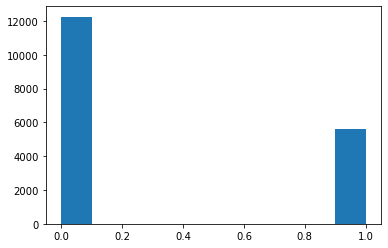

Average reward is 0.3135474468919904


In [475]:
#Reward plot
rewards = (df3.iloc[:, 3]).to_numpy()
plt.hist(rewards, bins=10)
plt.show()
#Average Reward
#Average reward can be used for pure guessing algorithm which does not use any information abou the context
average_reward = (df3.iloc[:, 3]).to_numpy().mean()
print("Average reward is" , (df3.iloc[:, 3]).to_numpy().mean())
random_guess = (df3.iloc[:, 3]).to_numpy().mean()
# df3 = df3.drop(["rating"], axis = 1)
df3 = df3.reset_index(drop = True)

In [476]:
df3.head()

,user_id,item_id,rating,reward
0,186,302,3,0.0
1,62,257,2,0.0
2,200,222,5,1.0
3,291,118,2,0.0
4,308,1,4,0.0


# Creating One Hot Movie Genre Profile

In [477]:
#Get movie data and encode movie genres in one-hot format
df2= pd.read_csv('./ml-100k/u.item',header = None, sep = "|")
df2 = df2.drop([1,2,3,4], axis = 1)

#Take genre names 
df_temp= pd.read_csv('./ml-100k/u.genre',header = None, sep = "|")
column_one_list = ["item_id"]
column_one_list = column_one_list + (df_temp[0].tolist())

df2.columns = column_one_list

print(df2.shape)
df2.head()

(1682, 20)


,item_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [478]:
#Eliminate movies that are not in top 50 
df2 = df2[df2['item_id'].isin(index_of_most_common_movies)]
print(df2.shape)
df2.head()
print(df2.iloc[:,0:29])

(50, 20)
     item_id  unknown  Action  Adventure  Animation  Children's  Comedy  \
0          1        0       0          0          1           1       1   
6          7        0       0          0          0           0       0   
8          9        0       0          0          0           0       0   
14        15        0       0          0          0           0       0   
21        22        0       1          0          0           0       0   
24        25        0       0          0          0           0       1   
49        50        0       1          1          0           0       0   
55        56        0       0          0          0           0       0   
63        64        0       0          0          0           0       0   
68        69        0       0          0          0           0       1   
78        79        0       1          0          0           0       0   
95        96        0       1          0          0           0       0   
97        98    

# Implemention of Linear Disjoint UCB

In [480]:
#A basic implementation of disjoint LinUCB 
class disjoint_linUCB_model:
    def __init__(self, number_of_arms, dimension, alpha, arm_indeces):
        
        self.k = number_of_arms
        self.dimension = dimension
        self.alpha = alpha
        self.arm_indeces = arm_indeces
        
        temp = []
        for i in range(self.k):
            temp.append(self.create_arm(arm_indeces[i]))
            
        self.list_of_arms = temp.copy()    
        
    def create_arm(self, arm_index):
    
        arm_index = arm_index
        A = np.identity(self.dimension)
        b = np.zeros([self.dimension,1])
        
        return [arm_index, A, b].copy()
    
    def calc_arm(self, x_t, index ):
    
        arm = self.list_of_arms[index]
        arm_index, A, b = arm

        inv_A = np.linalg.inv(A)
        theta = np.dot(inv_A, b )

        p_t = np.dot(theta.T, x_t) + self.alpha * np.sqrt(np.dot(x_t.T, np.dot(inv_A,x_t)))
        
        return p_t
    

    def find_arms_place(self, arm_index):
        
        list_of_arm_indexes = [item[0] for item in self.list_of_arms]
        place_of_arm = list_of_arm_indexes.index(arm_index)
        return place_of_arm
    
    def reward_update_arm(self, reward, x_t, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, A, b = arm
        
        A = A + np.dot(x_t, x_t.T)
        b = b + reward * x_t

        self.list_of_arms[self.find_arms_place(arm_index)] = [arm_index, A, b].copy()
        
    def choose_arm(self,x_t):
        p_list = []
        
        for i in range(self.k):
            p_arm = self.calc_arm(x_t, i)
            p_list.append(p_arm)
   
        max_arms = [index for index, value in enumerate(p_list) if value == max(p_list)]    
        
        chosen_arm = random.choice(max_arms)
        chosen_arm_index = self.list_of_arms[chosen_arm][0]
        
        return chosen_arm, chosen_arm_index
    
    def display_arm_info(self,index):
        print(self.list_of_arms[index])
    
        
        

In [483]:
#Test for sanity check
#Dont forget to drop user id if you are using this
model = disjoint_linUCB_model(number_of_arms = 20, dimension = 29, \
                       alpha = 0.5 , arm_indeces = index_of_most_common_movies)
x = user_data.iloc[307].to_numpy().reshape(29,1)
print(df3.iloc[4].to_numpy())
user_id, movie_id, rating, reward = df3.iloc[4].to_numpy()
print(movie_id)
print(model.choose_arm(x))
model.reward_update_arm(reward,x,int(movie_id))
# print(model.display_arm_info(7))
print(model.choose_arm(x))
print(model.choose_arm(x))
print(model.choose_arm(x))
#######################################################################################
np.random.seed(100)
data_processed = df3.reindex(np.random.permutation(df3.index)).reset_index(drop = True)
data_processed.head()
#######################################################################################
index_of_most_common_movies.sort()
print(index_of_most_common_movies)
print(df2.iloc[:,1:29])

[308.   1.   4.   0.]
1.0
(14, 117)
(19, 168)
(14, 117)
(2, 9)


In [449]:
def disjoint_linUCB_runner(K_arms, d, alpha, epochs, top_movies_index, steps=5000):
    model= disjoint_linUCB_model(number_of_arms = K_arms, dimension = d, 
                                 alpha = alpha, arm_indeces = top_movies_index)
    
    
    # Start tracking matchedd steps to find CTR
    matched_time_steps = 0
    cumulative_rewards = 0
    ctr = []
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))

        data = data_processed.copy()
        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"].astype(int)
            movie_id = data.loc[i, "item_id"].astype(int)

            x_array = np.array((user_data.iloc[user_id-1])) 
            x_array = data_x_array.reshape(29,1)

            reward = data.loc[i, "reward"]
            
            if i%steps == 0:
                print("step "+str(i))
            #Bandit algorithm choses an arm(movie)
            chosen_arm_index, chosen_movie = model.choose_arm(x_array)

            #We will only consider the case when movie selected by the arm matched with movie selected by the use
            if chosen_movie  == movie_id:

                model.reward_update_arm(reward, x_array,movie_id)
                
                matched_time_steps += 1
                cumulative_rewards += data_reward
                ctr.append(cumulative_rewards/matched_time_steps)

    return {"total_ctr_array":ctr}

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000


Text(0.5, 1.0, 'alpha = 0.25')

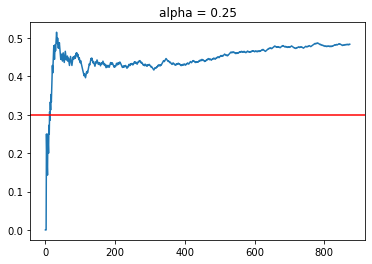

In [467]:
alpha_value = 0.25
simulation1 = disjoint_linUCB_runner(K_arms = 50, d = 29,alpha = alpha_value, epochs = 2, 
                                     top_movies_index = index_of_most_common_movies, steps=5000)
plt.plot(simulation1["total_ctr_array"])
plt.axhline(y=random_guess, color = "red")
plt.title("alpha = "+str(alpha_value))

# Plot for Different Alpha Values Disjoint LinUCB

In [501]:
list_of_alphas = [0.25, 0.5, 0.75, 1]
list_of_trajectories = []
for j in range (len(list_of_alphas)):
    average_linUCB = [0] * 755
    count = 10
    alpha_value = list_of_alphas[j]
    for i in range(count):
        np.random.seed(i)
        sim_linUCB= disjoint_linUCB_runner(K_arms = 50, d = 29, alpha = alpha_value, 
                                            epochs = 2, top_movies_index = index_of_most_common_movies, steps=5000)
        list1 = [x/count for x in sim_linUCB["total_ctr_array"]
        average_linUCB = [a + b for a, b in zip(average_linUCB, list1)]
    list_of_trajectories.append(average_linUCB)

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
ste

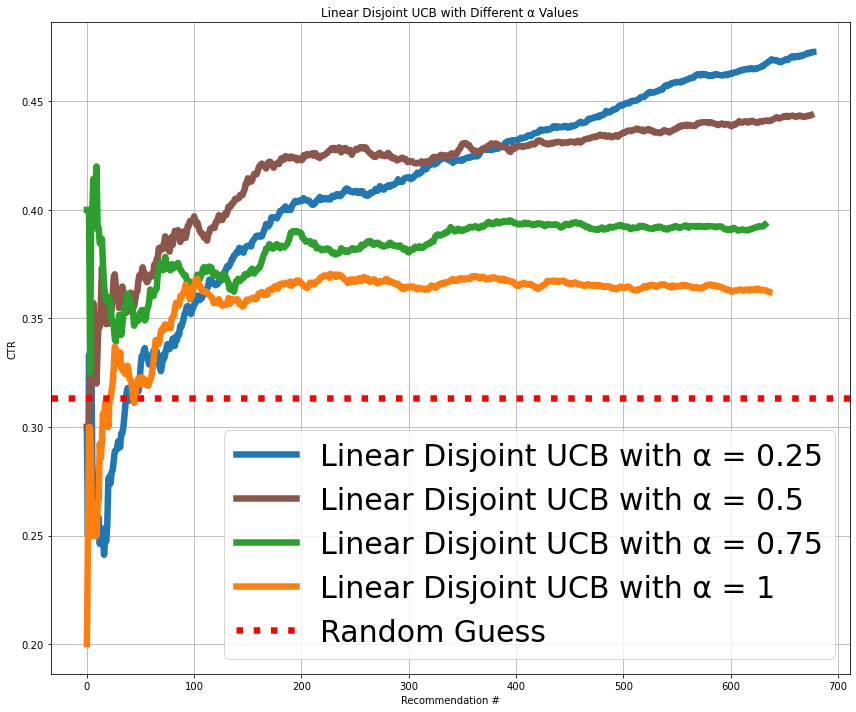

In [620]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df, style) in [(list_of_trajectories[0], 'tab:blue'),
                                (list_of_trajectories[1], 'tab:brown'),
                                (list_of_trajectories[2], 'tab:green'),
                                (list_of_trajectories[3], 'tab:orange'),
                               ]:
    ax.plot(avg_results_df, style, linewidth=6.5)

ax.set_title('Linear Disjoint UCB with Different \u03B1 Values')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('CTR') 
ax.grid()
ax.axhline(y=random_guess, color = "red", linestyle=':', linewidth=6.5)
ax.legend(['Linear Disjoint UCB with \u03B1 = {}'.format(list_of_alphas[0]),
           'Linear Disjoint UCB with \u03B1 = {}'.format(list_of_alphas[1]),
           'Linear Disjoint UCB with \u03B1 = {}'.format(list_of_alphas[2]),
           'Linear Disjoint UCB with \u03B1 = {}'.format(list_of_alphas[3]),
           'Random Guess'
          ],
          loc='lower right', prop={'size': 30}
         )
plt.tight_layout()
plt.savefig('Linear Disjoint UCB_alphas.png')
plt.show()

# Implemention of Linear Hybrid UCB

In [453]:
#A basic implementation of hybrid LinUCB 
class hybrid_linUCB_model:
    def __init__(self, number_of_arms, total_feature_number, dimension, alpha, arm_indeces, arm_features_list):
        
        self.k = number_of_arms
        self.f = total_feature_number
        self.dimension = dimension
        self.alpha = alpha
        
        self.arm_indeces = arm_indeces
        self.arm_features_list = arm_features_list
        
        self.A_zero = np.identity(self.f)
        self.b_zero = np.zeros([self.f,1])
        
        
        temp = []
        for i in range(self.k):
            temp.append(self.create_arm(arm_indeces[i], arm_features_list[i]))
            
        self.list_of_arms = temp.copy()    
        
        
    def create_arm(self, arm_index, arm_features):
    
        A = np.identity(self.dimension)
        b = np.zeros([self.dimension, 1])
        B = np.zeros([self.dimension, self.f])
        
        return [arm_index, arm_features, A, B, b].copy()
    
    def calc_arm(self, x_t, A_zero, beta, arm_index ):
    
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, arm_features, A, B, b = arm
        
        z_t = np.outer(arm_features, x_t).reshape(-1,1)
        
        inv_A = np.linalg.inv(A)
        theta = np.dot(inv_A, (b - np.dot(B, beta)))
        inv_A_zero = np.linalg.inv(self.A_zero)
        
        second_term = -2 * np.dot( z_t.T, np.dot(inv_A_zero, \
                                               np.dot( B.T, np.dot(inv_A,x_t))  )      )
        fourth_term = np.dot( x_t.T , np.dot(inv_A, \
                                            np.dot(B, np.dot(inv_A_zero, \
                                                            np.dot(B.T, np.dot(inv_A, x_t))))))       

        s_t = np.dot( z_t.T, np.dot(inv_A_zero,z_t)) + second_term + \
                    np.dot( x_t.T, np.dot(inv_A,x_t)) + fourth_term
        
        p_t = np.dot(z_t.T, beta) + np.dot(theta.T, x_t) + self.alpha * np.sqrt(s_t)    
        
        return p_t
    

    def find_arms_place(self, arm_index):
        
        list_of_arm_indexes = [item[0] for item in self.list_of_arms]
#         print(list_of_arm_indexes)
        place_of_arm = list_of_arm_indexes.index(arm_index)
        return place_of_arm
    
    def reward_update_arm(self, reward, x_t, z_t, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, arm_features, A, B, b = arm
        
        A = A + np.dot(x_t, x_t.T)
        B = B + np.dot(x_t, z_t.T)
        b = b + reward * x_t

        self.list_of_arms[self.find_arms_place(arm_index)] = [arm_index, arm_features, A, B, b].copy()
    
    def first_update(self, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, arm_features, A, B, b = arm
        inv_A = np.linalg.inv(A)
        
        self.A_zero = self.A_zero + np.dot( B.T, np.dot(inv_A, B))
        self.b_zero = self.b_zero + np.dot( B.T, np.dot(inv_A, b))
    
    def second_update(self, reward, x_t, z_t, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, arm_features, A, B, b = arm
        inv_A = np.linalg.inv(A)
        
        self.A_zero = self.A_zero + np.dot(z_t,z_t.T) - np.dot(B.T, np.dot(inv_A, B))
        self.b_zero = self.b_zero + reward * z_t - np.dot(B.T, np.dot(inv_A, b))
        
    
    def choose_arm(self,x_t):
        p_list = []
        
        inv_A_zero = np.linalg.inv(self.A_zero)
        beta = np.dot(inv_A_zero, self.b_zero)
        
        for i in range(self.k):
            
            p_arm = self.calc_arm(x_t, self.A_zero, beta, self.arm_indeces[i])
            p_list.append(p_arm)
            
        print(p_list)
        max_arms = [index for index, value in enumerate(p_list) if value == max(p_list)]    
        chosen_arm = random.choice(max_arms)
        chosen_arm_index = self.list_of_arms[chosen_arm][0]
        
        return chosen_arm, chosen_arm_index
    
    def calculate_z_t(self, x_t, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, arm_features, A, B, b = arm
        
        z_t = np.outer(arm_features, x_t).reshape(-1,1)
        return z_t
        
    def display_arm_info(self,index):
        print(self.list_of_arms[index])
    

In [454]:
index_of_most_common_movies.sort()
print(index_of_most_common_movies)
print(df2.iloc[:,1:29])
arm_indices = index_of_most_common_movies
arm_features_list = df2.iloc[:,1:29].to_numpy()
print(arm_features[0])

[  1   7   9  15  22  25  50  56  64  69  79  96  98 100 117 118 121 127
 151 168 172 173 174 176 181 183 191 195 202 204 210 216 222 234 237 257
 258 269 276 286 288 294 300 302 313 318 328 405 423 748]
     unknown  Action  Adventure  Animation  Children's  Comedy  Crime  \
0          0       0          0          1           1       1      0   
6          0       0          0          0           0       0      0   
8          0       0          0          0           0       0      0   
14         0       0          0          0           0       0      0   
21         0       1          0          0           0       0      0   
24         0       0          0          0           0       1      0   
49         0       1          1          0           0       0      0   
55         0       0          0          0           0       0      1   
63         0       0          0          0           0       0      0   
68         0       0          0          0           0       1    

In [455]:
#Test for sanity check
#Dont forget to drop user id if you are using this
index_of_most_common_movies.sort()
arm_indices = index_of_most_common_movies
arm_features_list = df2.iloc[:,1:29].to_numpy()
np.random.seed(1111)
model_hybrid = hybrid_linUCB_model(number_of_arms = 50,  total_feature_number = 29*19 ,
                        dimension = 29, alpha = 0.15 ,\
                            arm_indeces = index_of_most_common_movies,\
                                 arm_features_list = arm_features_list  )


x_t = user_data.iloc[3].to_numpy().reshape(29,1)
print(df3.iloc[14].to_numpy())
user_id, movie_id, rating, reward = df3.iloc[14].to_numpy()
print(movie_id)
chosen_arm, chosen_arm_index = model_hybrid.choose_arm(x_t)
print("Chosen arm", chosen_arm)
print("Chosen arm index", chosen_arm_index)
model_hybrid.first_update(chosen_arm_index)

z_t = model_hybrid.calculate_z_t(x_t, chosen_arm_index)

model_hybrid.reward_update_arm(reward, x_t, z_t, chosen_arm_index)

model_hybrid.second_update(reward, x_t, z_t, chosen_arm_index)

# print(model.display_arm_info(7))
print(model_hybrid.choose_arm(x_t))
# for i in range (9):

#     chosen_arm, chosen_arm_index = model_hybrid.choose_arm(x_t)
#     model_hybrid.first_update(chosen_arm_index)

#     z_t = model_hybrid.calculate_z_t(x_t, chosen_arm_index)

#     model_hybrid.reward_update_arm(reward, x_t, z_t, chosen_arm_index)

#     model_hybrid.second_update(reward, x_t, z_t, chosen_arm_index)
#     print(model_hybrid.choose_arm(x_t))
#     print(model_hybrid.choose_arm(x_t))
#######################################################################################
np.random.seed(100)
data_processed = df3.reindex(np.random.permutation(df3.index)).reset_index(drop = True)
data_processed.head()

[ 32. 294.   3.   0.]
294.0
[array([[0.51961524]]), array([[0.45]]), array([[0.36742346]]), array([[0.36742346]]), array([[0.51961524]]), array([[0.36742346]]), array([[0.6363961]]), array([[0.45]]), array([[0.36742346]]), array([[0.51961524]]), array([[0.45]]), array([[0.51961524]]), array([[0.45]]), array([[0.51961524]]), array([[0.51961524]]), array([[0.51961524]]), array([[0.51961524]]), array([[0.51961524]]), array([[0.51961524]]), array([[0.36742346]]), array([[0.68738635]]), array([[0.5809475]]), array([[0.45]]), array([[0.5809475]]), array([[0.6363961]]), array([[0.5809475]]), array([[0.45]]), array([[0.51961524]]), array([[0.45]]), array([[0.45]]), array([[0.45]]), array([[0.45]]), array([[0.51961524]]), array([[0.45]]), array([[0.45]]), array([[0.5809475]]), array([[0.45]]), array([[0.36742346]]), array([[0.45]]), array([[0.51961524]]), array([[0.45]]), array([[0.36742346]]), array([[0.45]]), array([[0.5809475]]), array([[0.51961524]]), array([[0.45]]), array([[0.5809475]]), 

In [457]:
def hybrid_linUCB_runner(K_arms, total_feature_number, d, alpha,\
                           epochs, top_movies_index, top_movies_features, steps=5000):
    model_hybrid = hybrid_linUCB_model(number_of_arms = K_arms,  total_feature_number = total_feature_number ,
                        dimension = d, alpha = alpha ,\
                            arm_indeces =  top_movies_index,\
                                 arm_features_list = top_movies_features )
    
    # Start tracking matched steps to find CTR
    matched_time_steps = 0
    cumulative_rewards = 0
    ctr = []
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        data = data_processed.copy()

        for i in range(len(data)):

            user_id = data.loc[i,"user_id"].astype(int)
            movie_id = data.loc[i, "item_id"].astype(int)

            x_array = np.array((user_data.iloc[user_id-1])) 
            x_array = data_x_array.reshape(29,1)

            reward = data.loc[i, "reward"]

            if i%steps == 0:
                print("step "+str(i))

            #Bandit algorithm choses an arm(movie)
            chosen_arm_index, chosen_movie = model.choose_arm(x_array)

            #We will only consider the case when movie selected by the arm matched with movie selected by the use
            if chosen_movie  == movie_id:

                model_hybrid.first_update(chosen_movie)

                z_t = model_hybrid.calculate_z_t(x_array, chosen_movie)

                model_hybrid.reward_update_arm(reward, x_array, z_t, chosen_movie)

                model_hybrid.second_update(reward, x_array, z_t, chosen_movie)
                
                matched_time_steps += 1
                cumulative_rewards += reward
                ctr.append(cumulative_rewards/matched_time_steps)

    return {"total_ctr_array":ctr}

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 2
step 0
step 5000
step 10000
step 15000


Text(0.5, 1.0, 'alpha = 0.25')

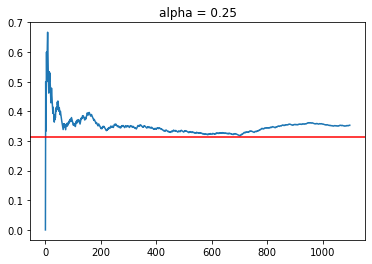

In [458]:
alpha_value = 0.25
simulation2 = hybrid_linUCB_runner(K_arms = 50, total_feature_number = 29*19,d = 29,
                                           alpha = alpha_value, epochs = 3, top_movies_index = arm_indices, 
                                           top_movies_features=arm_features_list, steps=5000)
plt.plot(simulation2["total_ctr_array"])
plt.axhline(y=0.313, color = "red")
plt.title("alpha = "+str(alpha_value))

# Plot for Different Alpha Values Hybrid LinUCB

In [592]:
list_of_alphas = [0.25, 0.5, 0.75, 1]
list_of_trajectories_hybrid = []
for j in range (len(list_of_alphas)):
    average_hyb = [0] * 1000
    count = 20
    alpha_value = list_of_alphas[j]
    for i in range(count):
        np.random.seed(i)
        sim_hybrid= hybrid_linUCB_runner(K_arms = 50, 
                                           total_feature_number = 29*19,
                                           d = 29,
                                           alpha = alpha_value, 
                                           epochs = 2, 
                                           top_movies_index = arm_indices, 
                                           top_movies_features=arm_features_list,
                                           steps=5000)
        list1_hybrid = [x/count for x in sim_hybrid["total_ctr_array"]]
        average_hyb = [a + b for a, b in zip(average_hyb, list1_hybrid)]
    list_of_trajectories_hybrid.append(average_hyb)

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
ste

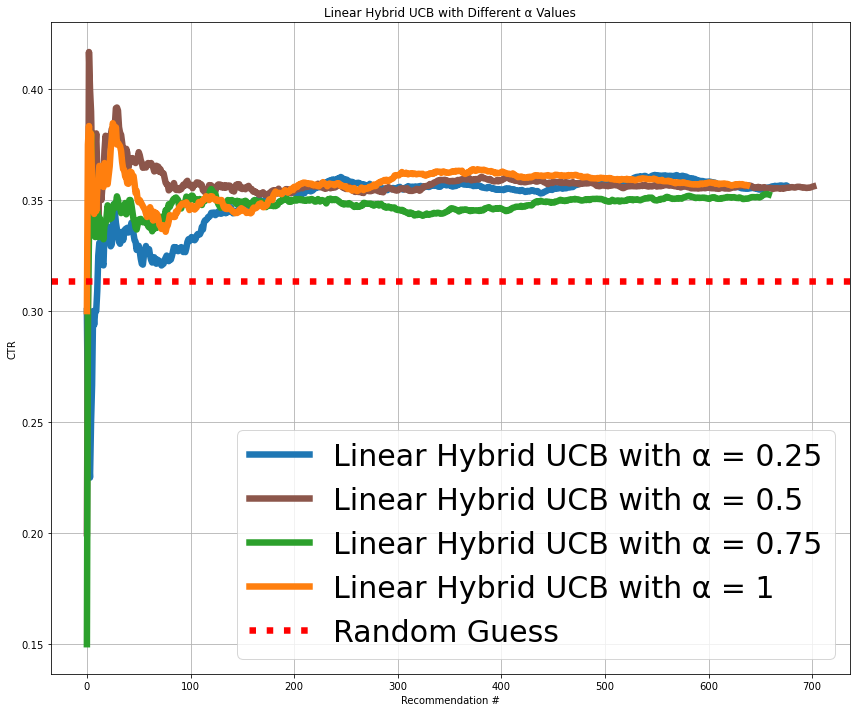

In [619]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df2, style2) in [(list_of_trajectories_hybrid[0], 'tab:blue'),
                                (list_of_trajectories_hybrid[1], 'tab:brown'),
                                (list_of_trajectories_hybrid[2], 'tab:green'),
                                (list_of_trajectories_hybrid[3], 'tab:orange'),
                               ]:
    ax.plot(avg_results_df2, style2, linewidth=6.5)

ax.set_title('Linear Hybrid UCB with Different \u03B1 Values')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('CTR') 
ax.grid()
ax.axhline(y=random_guess, color = "red", linestyle=':', linewidth=6.5)
ax.legend(['Linear Hybrid UCB with \u03B1 = {}'.format(list_of_alphas[0]),
           'Linear Hybrid UCB with \u03B1 = {}'.format(list_of_alphas[1]),
           'Linear Hybrid UCB with \u03B1 = {}'.format(list_of_alphas[2]),
           'Linear Hybrid UCB with \u03B1 = {}'.format(list_of_alphas[3]),
           'Random Guess'
          ],
          loc='lower right', prop={'size': 30}
         )
plt.tight_layout()
plt.savefig('Linear Hybrid UCB_alphas.png')
plt.show()



# Linear Thompson Sampling

In [518]:
#Basic implementation of Linear Thompson Sampling
class linThompson_model:
    def __init__(self, number_of_arms, dimension, alpha,\
                                         R, delta, arm_indeces):
        
        self.k = number_of_arms
        self.dimension = dimension
        self.alpha = alpha
        self.arm_indeces = arm_indeces
        
        self.R = R
        self.delta = delta
        
        temp = []
        for i in range(self.k):
            temp.append(self.create_arm(arm_indeces[i]))
            
        self.list_of_arms = temp.copy()    
        
    def create_arm(self, arm_index):
    
        arm_index = arm_index
        A = np.identity(self.dimension)
        b = np.zeros([self.dimension,1])
        
        return [arm_index, A, b].copy()
    
    def calc_arm(self, x_t, index, iter_number ):
    
        arm = self.list_of_arms[index]
        arm_index, A, b = arm

        inv_A = np.linalg.inv(A)
        theta = np.dot(inv_A, b )
        
        #Gaussian sample
        
        v = self.R * np.sqrt( 9 * self.dimension * math.log(iter_number / self.delta)) 
        variance = v * v * inv_A
        s = np.random.multivariate_normal(theta.reshape(-1,), variance, 1)
#         p_t = np.dot(theta.T, x_t) + self.alpha * np.sqrt(np.dot(x_t.T, np.dot(inv_A,x_t)))
#         print(np.array(s).shape)
        p_t = np.dot(s, x_t)
    
        return p_t
    

    def find_arms_place(self, arm_index):
        
        list_of_arm_indexes = [item[0] for item in self.list_of_arms]
        place_of_arm = list_of_arm_indexes.index(arm_index)
        return place_of_arm
    
    def reward_update_arm(self, reward, x_t, arm_index):
        arm = self.list_of_arms[self.find_arms_place(arm_index)]
        arm_index, A, b = arm
        
        A = A + np.dot(x_t, x_t.T)
        b = b + reward * x_t

        self.list_of_arms[self.find_arms_place(arm_index)] = [arm_index, A, b].copy()
        
    def choose_arm(self,x_t, iter_number):
        p_list = []
        
        for i in range(self.k):
            p_arm = self.calc_arm(x_t, i,iter_number)
            p_list.append(p_arm)
   
        max_arms = [index for index, value in enumerate(p_list) if value == max(p_list)]    
        
        chosen_arm = random.choice(max_arms)
        chosen_arm_index = self.list_of_arms[chosen_arm][0]
        
        return chosen_arm, chosen_arm_index
    
    def display_arm_info(self,index):
        print(self.list_of_arms[index])
    

In [519]:
def linThompson_runner(K_arms, d, alpha, epochs, top_movies_index, 
                               R, delta, steps=5000):
    model= linThompson_model(number_of_arms = K_arms, dimension = d, 
                                 alpha = alpha, R = R, delta = delta,
                                     arm_indeces = top_movies_index)
    
    # Start tracking matched steps to find CTR
    matched_time_steps = 0
    cumulative_rewards = 0
    ctr = []
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        data = data_processed.copy()

        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"].astype(int)
            movie_id = data.loc[i, "item_id"].astype(int)

            x_array = np.array((user_data.iloc[user_id-1]))
            x_array = data_x_array.reshape(29,1)

            data_reward = data.loc[i, "reward"]

            if i%steps_printout == 0:
                print("step "+str(i))

            #Bandit algorithm choses an arm(movie)
            chosen_arm_index, chosen_movie = model.choose_arm(data_x_array, 10)

            #We will only consider the case when movie selected by the arm matched with movie selected by the use
            if chosen_movie  == movie_id:

               
                model.reward_update_arm(data_reward, data_x_array,movie_id)
                                
                matched_time_steps += 1
                cumulative_rewards += data_reward
                ctr.append(cumulative_rewards/matched_time_steps)

    return {"total_ctr_array":ctr}

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000


Text(0.5, 1.0, 'alpha = 0.3')

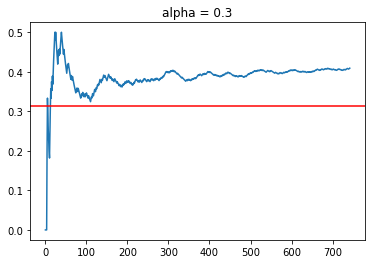

In [462]:
alpha_value = 0.3
sim = linThompson_runner(K_arms = 50, d = 29, alpha = alpha_value, epochs =2, 
                             top_movies_index = index_of_most_common_movies, 
                                   R = 0.01, delta = 0.5, steps=5000)
plt.plot(sim["total_ctr_array"])
plt.axhline(y=0.313, color = "red")
plt.title("alpha = "+str(alpha_value))

# Average LinThompson Sampling

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000


Text(0.5, 1.0, 'alpha = 0.25')

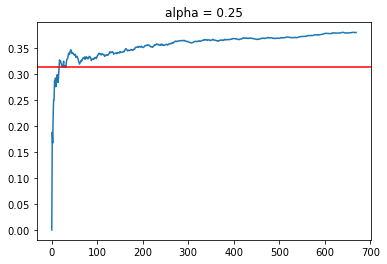

In [464]:
average_linthomp = [0] * 670
count = 8
for i in range(count):
    np.random.seed(i)
    alpha_value = 0.25
    sim = linThompson_runner(K_arms = 50, d = 29, alpha = alpha_value, epochs =2, 
                             top_movies_index = index_of_most_common_movies, 
                                   R = 0.01, delta = 0.5, steps=5000)
    
    list2 = [x/count for x in sim["total_ctr_array"]]
    average_linthomp = [a + b for a, b in zip(average_linthomp, list2)]
plt.plot(average_linthomp)
plt.axhline(y=0.313, color = "red")
plt.title("alpha = "+str(alpha_value))  

In [465]:
mean = (np.array([0, 0]).reshape(-1,1)).reshape(-1,)
cov = np.array([[1, 0], [0, 100]] )
print(mean)
y = np.random.multivariate_normal(mean, cov, 2)
print(y)

[0 0]
[[-0.7167095  -4.47684213]
 [ 0.68469392 -9.60746224]]


# Draw for Different Alpha Values Linear Thompson Sampling

In [548]:
list_of_alphas = [0.25, 0.5, 0.75, 1]
list_of_trajectories_linThomp = []
for j in range (len(list_of_alphas)):
    average_linThomp = [0] * 700
    count = 5
    alpha_value = list_of_alphas[j]
    for i in range(count):
        np.random.seed(i)
        sim_linThomp = linThompson_runner(K_arms = 50, d = 29, alpha = alpha_value, epochs =2, 
                             top_movies_index = index_of_most_common_movies, 
                                   R = 0.01, delta = alpha_value, steps = 5000)
        
        list1_linThomp = [x/count for x in sim_linThomp["total_ctr_array"]]
        average_linThomp = [a + b for a, b in zip(average_linThomp, list1_linThomp)]
    list_of_trajectories_linThomp.append(average_linThomp)

Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
step 15000
Epoch: 1
step 0
step 5000
step 10000
step 15000
Epoch: 0
step 0
step 5000
step 10000
ste

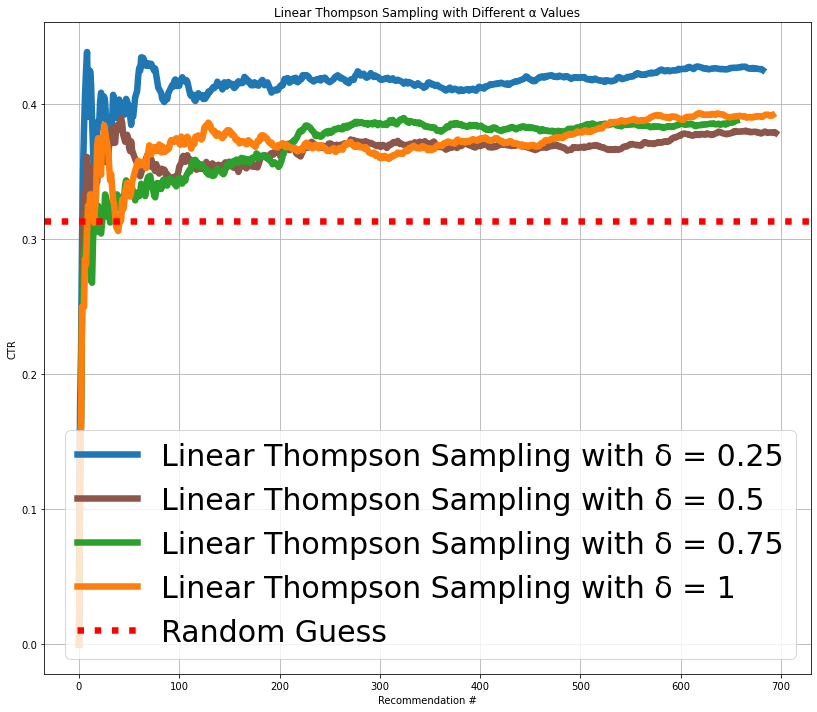

In [618]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df3, style2) in [(list_of_trajectories_linThomp[0], 'tab:blue'),
                                  (list_of_trajectories_linThomp[1], 'tab:brown'),
                                  (list_of_trajectories_linThomp[2], 'tab:green'),
                                  (list_of_trajectories_linThomp[3], 'tab:orange'),
                               ]:
    ax.plot(avg_results_df3, style2, linewidth=6.5)

ax.set_title('Linear Thompson Sampling with Different \u03B1 Values')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('CTR') 
ax.grid()
ax.axhline(y=random_guess, color = "red", linestyle=':', linewidth=6.5)
ax.legend(['Linear Thompson Sampling with \u03B4 = {}'.format(list_of_alphas[0]),
           'Linear Thompson Sampling with \u03B4 = {}'.format(list_of_alphas[1]),
           'Linear Thompson Sampling with \u03B4 = {}'.format(list_of_alphas[2]),
           'Linear Thompson Sampling with \u03B4 = {}'.format(list_of_alphas[3]),
           'Random Guess'
          ],
          loc='lower right', prop={'size':30}
         )
plt.tight_layout()
plt.savefig('LinThomp_different_alphas.png')
plt.show()

In [541]:
plt.savefig('LinThomp_different_alphas.png')
Image.open('testplot.png').save('testplot.jpg','JPEG')

NameError: name 'Image' is not defined

<Figure size 432x288 with 0 Axes>

# Best Graph

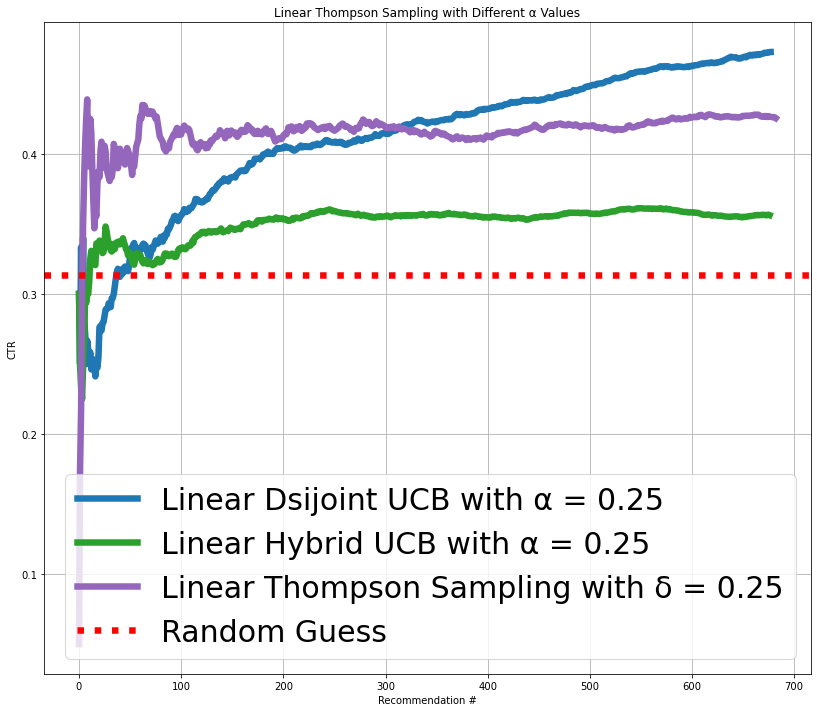

In [617]:
# We will use the best hyperparameters for each algorithm to make a comparison.
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df4, style3) in [(list_of_trajectories[0], 'tab:blue'),
                                  (list_of_trajectories_hybrid[0], 'tab:green'),
                                  (list_of_trajectories_linThomp[0], 'tab:purple'),
                               ]:
    ax.plot(avg_results_df4, style3, linewidth=6.5)

ax.set_title('Linear Thompson Sampling with Different \u03B1 Values')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('CTR') 
ax.grid()
ax.axhline(y=random_guess, color = "red", linestyle=':', linewidth=6.5)
ax.legend(['Linear Dsijoint UCB with \u03B1 = {}'.format(list_of_alphas[0]),
           'Linear Hybrid UCB with \u03B1 = {}'.format(list_of_alphas[0]),
           'Linear Thompson Sampling with \u03B4 = {}'.format(list_of_alphas[0]),
           'Random Guess'
          ],
          loc='lower right', prop={'size': 30}
         )
plt.tight_layout()
plt.savefig('final graph.png')
plt.show()

In [601]:
#As simulation ends the algorithms achieve following increase in reward compared to random guess
print((list_of_trajectories_linThomp[0][-1]-random_guess) * 100)
print((list_of_trajectories_hybrid[0][-1]-random_guess) * 100)
print((list_of_trajectories[0][-1]-random_guess) * 100)

11.20016014242614
4.273024882440546
15.916641741479436
